In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
!sudo mkdir /content/drive1
!google-drive-ocamlfuse /content/drive1

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144628 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.23-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
!unzip '/content/drive1/Copie de data_lidar.zip'

Streaming output truncated to the last 5000 lines.
  inflating: content/Voxelnet/crop_data/validation/velodyne/004238.bin  
  inflating: content/Voxelnet/crop_data/validation/velodyne/004236.bin  
  inflating: content/Voxelnet/crop_data/validation/velodyne/006419.bin  
  inflating: content/Voxelnet/crop_data/validation/velodyne/007418.bin  
  inflating: content/Voxelnet/crop_data/validation/velodyne/004264.bin  
  inflating: content/Voxelnet/crop_data/validation/velodyne/003237.bin  
  inflating: content/Voxelnet/crop_data/validation/velodyne/006671.bin  
  inflating: content/Voxelnet/crop_data/validation/velodyne/003431.bin  
  inflating: content/Voxelnet/crop_data/validation/velodyne/003340.bin  
  inflating: content/Voxelnet/crop_data/validation/velodyne/006915.bin  
  inflating: content/Voxelnet/crop_data/validation/velodyne/000586.bin  
  inflating: content/Voxelnet/crop_data/validation/velodyne/000449.bin  
  inflating: content/Voxelnet/crop_data/validation/velodyne/002409.bin  


In [ ]:
#GPU count and name
!nvidia-smi -L

#use this command to see GPU activity while doing Deep Learning tasks, for this command 'nvidia-smi' and for above one to work, go to 'Runtime > change runtime type > Hardware Accelerator > GPU'
!nvidia-smi

!lscpu |grep 'Model name'

#no.of sockets i.e available slots for physical processors
!lscpu | grep 'Socket(s):'

#no.of cores each processor is having 
!lscpu | grep 'Core(s) per socket:'

#no.of threads each core is having
!lscpu | grep 'Thread(s) per core'

!lscpu | grep "L3 cache"

#if it had turbo boost it would've shown Min and Max MHz also but it is only showing current frequency this means it always operates at 2.3GHz
!lscpu | grep "MHz"

#memory that we can use
!free -h --si | awk  '/Mem:/{print $2}'


#hard disk space that we can use
!df -h / | awk '{print $4}'

GPU 0: Tesla K80 (UUID: GPU-705b7eb1-ab0d-6f6a-9a43-ab057bac8719)
Wed Oct 28 13:00:33 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                      

In [ ]:
# Apex install
#uncomment this line
#!git clone https://github.com/NVIDIA/apex && cd apex && pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" . --user && cd .. && rm -rf apex

Cloning into 'apex'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 7456 (delta 0), reused 0 (delta 0), pack-reused 7455
Receiving objects: 100% (7456/7456), 13.91 MiB | 26.19 MiB/s, done.
Resolving deltas: 100% (5036/5036), done.
/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-gh5voo4v
Created temporary directory: /tmp/pip-req-tracker-uw7tfdz5
Created requirements tracker '/tmp/pip-req-tracker-uw7tfdz5'
Created temporary directory: /tmp/pip-install-o2jeu9v7
Processing /content/apex
  Created temporary directory: /tmp/pip-req-build-7zlsv0l4
  Added file:///content/apex to build tracker '/tmp/pip-req-tracker-uw7tfdz5'
    Running setup.py (path:/tmp/pip-req-build-7zlsv0l4/setup.py) egg_info 

In [ ]:
!pip install --upgrade pip
#!pip install xmltodict

     |████████████████████████████████| 1.5MB 2.7MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
#import xmltodict

In [ ]:
import pandas as pd
df=pd.DataFrame(columns=['image_id','xmin','ymin','xmax','ymax','classes','width','height'])

In [ ]:
datadir='/content/content/Voxelnet/crop_data/training/label_2'
folder='/content/content/Voxelnet/crop_data/training/'
#size={}
mylines=[]
elems=[]
for img in os.listdir(datadir):
    fullpath=os.path.join(datadir,img)
    extension = fullpath[len(fullpath) - 4:]
    name=img[:len(img)-4]
    print(name)

    image = cv2.imread(folder+'image_2/'+name+ '.png')
    #print(folder+'images_2/'+name+ '.png')
  

    with open (fullpath, 'rt') as myfile: # Open lorem.txt for reading text data.
      for myline in myfile:                # For each line, stored as myline,
          mylines=[myline]
          elems=mylines[0].split(' ')

          dicte={
                  'image_id':[name],
                  'xmin':elems[4],
                  'ymin':elems[5],
                  'xmax':elems[6],
                  'ymax':elems[7],
                  'classes':elems[0],
                  'width':image.shape[1],
                  'height':image.shape[0],
                  }
          dat=pd.DataFrame(dicte)
          df=pd.concat([df,dat])

005325
003071
001253
003879
007056
006925
006873
006882
005375
004327
007063
001352
003631
004349
001162
004271
003330
007168
003221
000001
003162
002089
002250
005445
005762
004591
005174
001497
003343
003965
003608
003937
003972
001701
005905
007154
004391
000922
005570
002765
005552
007319
004187
006569
002486
006406
005477
006210
000321
000716
003866
001931
006643
001129
002308
006215
002896
005369
007439
005127
007059
006732
001585
004010
001718
004534
000510
002399
001466
001224
000453
004072
007022
007337
006427
006884
003480
006558
002930
002341
001564
003779
004100
001131
001318
002356
004065
005073
004275
002021
000893
001567
007299
003146
000391
002314
003341
003402
005075
007010
004667
001923
002966
002890
001813
000542
001389
005566
000272
001942
000843
007384
001817
001619
007376
001374
005916
003029
005988
003033
006754
006577
003557
004474
006190
001242
007410
001801
001579
004251
004026
002385
000949
006982
001600
005276
001549
004493
002686
004986
000218
001664
006950

In [ ]:
datadir='/content/content/Voxelnet/crop_data/validation/label_2'
folder='/content/content/Voxelnet/crop_data/validation/'
#size={}
mylines=[]
elems=[]
for img in os.listdir(datadir):
    fullpath=os.path.join(datadir,img)
    extension = fullpath[len(fullpath) - 4:]
    name=img[:len(img)-4]
    print(name)

    image = cv2.imread(folder+'image_2/'+name+ '.png')
    #print(folder+'images_2/'+name+ '.png')
  

    with open (fullpath, 'rt') as myfile: # Open lorem.txt for reading text data.
      for myline in myfile:                # For each line, stored as myline,
          mylines=[myline]
          elems=mylines[0].split(' ')

          dicte={
                  'image_id':[name],
                  'xmin':elems[4],
                  'ymin':elems[5],
                  'xmax':elems[6],
                  'ymax':elems[7],
                  'classes':elems[0],
                  'width':image.shape[1],
                  'height':image.shape[0],
                  }
          dat=pd.DataFrame(dicte)
          df=pd.concat([df,dat])

002807
001556
005003
003271
001041
000574
002560
002864
005046
007388
003534
001930
001034
000516
000845
005232
001122
003122
001109
003060
002849
001092
001196
005031
004514
000390
007160
004236
003713
005771
007333
001873
001499
002147
003957
002268
003380
001204
005694
004515
001087
002679
004286
002791
006346
003119
004915
006857
003991
004272
005846
003732
003731
005609
002264
000820
001518
002871
002593
004775
005200
001753
004325
002090
006652
003760
003768
004054
000505
005442
001990
003797
002802
004005
000097
002172
000130
006329
004015
001870
005661
001798
005059
006654
000296
006805
006158
005290
002664
002141
004459
005291
005810
006864
002006
005723
002453
002407
006681
001777
001459
001769
003389
002588
002553
003893
001843
000051
004969
005305
006072
003078
005788
007159
000550
007365
001601
004765
005804
002412
002088
003287
005084
005332
000511
002489
003612
001614
005451
006967
005357
003510
004057
006662
002227
002691
007460
000146
000464
002231
003157
003680
001681

In [ ]:
classes = df['classes'].unique().tolist()
classes.sort()

In [ ]:
classes

['Car',
 'Cyclist',
 'DontCare',
 'Misc',
 'Pedestrian',
 'Person_sitting',
 'Tram',
 'Truck',
 'Van']

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder =LabelEncoder() 
df['classes']= label_encoder.fit_transform(df['classes']) 

for i in ['xmin','ymin','xmax','ymax','classes','width','height']:
    df[i]=df[i].astype(float)

In [ ]:
df

,image_id,xmin,ymin,xmax,ymax,classes,width,height
0,005325,598.68,175.43,626.54,202.96,0.0,1242.0,375.0
0,005325,347.53,184.14,402.94,214.40,0.0,1242.0,375.0
0,005325,410.72,181.87,459.33,212.32,0.0,1242.0,375.0
0,005325,489.90,178.65,514.21,196.72,0.0,1242.0,375.0
0,003071,784.34,150.15,857.00,175.01,0.0,1224.0,370.0
...,...,...,...,...,...,...,...,...
0,004840,333.24,175.59,369.04,193.80,0.0,1242.0,375.0
0,004840,574.97,173.53,614.91,213.32,0.0,1242.0,375.0
0,004840,372.06,164.60,433.56,182.35,2.0,1242.0,375.0
0,004840,461.65,170.85,477.32,182.35,2.0,1242.0,375.0


In [ ]:
df['w'] = df['xmax'] - df['xmin']
df['h'] = df['ymax'] - df['ymin']
df['x_center'] = df['xmin'] + df['w']/2
df['y_center'] = df['ymin'] + df['h']/2
#normalisation
df['x_center']=df['x_center'] / df['width']
df['w']=df['w'] / df['width']
df['y_center'] =df['y_center'] / df['height']
df['h']=df['h'] / df['height']


#from tqdm.auto import tqdm
import shutil as sh
df = df[['image_id','xmin', 'ymin', 'w', 'h','x_center','y_center','classes','width','height']]

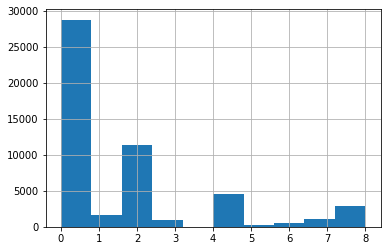

In [ ]:
df['classes'].hist()

In [ ]:
names=df['image_id'].unique().tolist()

In [ ]:
data=pd.DataFrame(names,columns=['image_id'])
train=data.iloc[:7000,:]
test=data.iloc[7000:,:]

In [ ]:
traindf=pd.merge(train,df,on=['image_id'],how='left')
testdf=pd.merge(test,df,on=['image_id'],how='left')

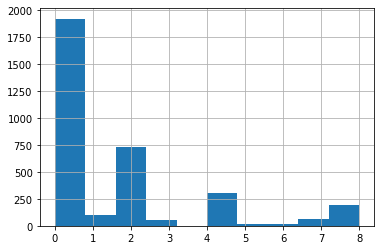

In [ ]:
testdf['classes'].hist()

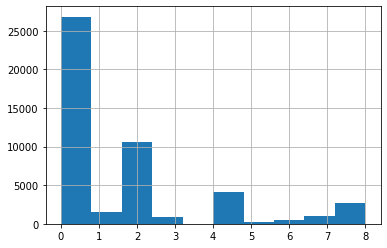

In [ ]:
traindf['classes'].hist()

In [ ]:
!mv '/content/content/Voxelnet/crop_data/training/image_2' '/content/'

In [ ]:
import os, shutil
path = "/content/content/Voxelnet/crop_data/validation/image_2/"
moveto = "/content/image_2/"
files = os.listdir(path)
files.sort()
for f in files:
    src = path+f
    dst = moveto+f
    shutil.move(src,dst)


In [ ]:
def createDirectory(dirname):
    try:
        os.mkdir(dirname)
    except FileExistsError:
        print("Directory " + dirname + " already exists.")

In [ ]:
#all_dir='/content/images/'
train_dir='/content/train/'
test_dir='/content/test/'

#createDirectory(all_dir)
createDirectory(train_dir)
createDirectory(test_dir)

In [ ]:
datadir='/content/image_2/'
for img in train['image_id']:
    fullpath=os.path.join(datadir,img +'.png')
    print(fullpath)
    #image=cv2.imread(fullpath)
    #resized = cv2.resize(image, (416,416), interpolation = cv2.INTER_AREA)
    dst=train_dir + img + '.png'
    shutil.move(fullpath,dst)
    #cv2.imwrite(train_dir + img + '.png', image)
    #plt.imshow(image)
    #plt.show()

for img in test['image_id']:
    fullpath=os.path.join(datadir,img +'.png')
    print(fullpath)
    #image=cv2.imread(fullpath)
    #resized = cv2.resize(image, (416,416), interpolation = cv2.INTER_AREA)
    dst=test_dir + img + '.png'
    shutil.move(fullpath,dst)
    #cv2.imwrite(test_dir + img + '.png', image)
    #plt.imshow(image)
    #plt.show()

Streaming output truncated to the last 5000 lines.
/content/image_2/005811.png
/content/image_2/001574.png
/content/image_2/002951.png
/content/image_2/002042.png
/content/image_2/000974.png
/content/image_2/000413.png
/content/image_2/007030.png
/content/image_2/004547.png
/content/image_2/001526.png
/content/image_2/005347.png
/content/image_2/005994.png
/content/image_2/004903.png
/content/image_2/002747.png
/content/image_2/000729.png
/content/image_2/000124.png
/content/image_2/005028.png
/content/image_2/004414.png
/content/image_2/006942.png
/content/image_2/003691.png
/content/image_2/005505.png
/content/image_2/000278.png
/content/image_2/004085.png
/content/image_2/000329.png
/content/image_2/007271.png
/content/image_2/003031.png
/content/image_2/000674.png
/content/image_2/007279.png
/content/image_2/003042.png
/content/image_2/006534.png
/content/image_2/004480.png
/content/image_2/000152.png
/content/image_2/004392.png
/content/image_2/005341.png
/content/image_2/000628.p

In [ ]:
#!rm -rf /content/test/

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -r yolov5/requirements.txt  # install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 2710, done.
remote: Total 2710 (delta 0), reused 0 (delta 0), pack-reused 2710
Receiving objects: 100% (2710/2710), 5.46 MiB | 4.15 MiB/s, done.
Resolving deltas: 100% (1794/1794), done.
     |████████████████████████████████| 276kB 2.7MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=ef0c90bf9f424ed13e97a8e7aa9eb4cf74ed64bf216badc213b757aaba41dbd6
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!unzip /content/config.zip

Archive:  /content/config.zip
   creating: config/
   creating: config/configyolo5v1/
  inflating: config/configyolo5v1/yolov5x.yaml  
  inflating: config/configyolo5v1/wheat4.yaml  
  inflating: config/configyolo5v1/wheat3.yaml  
  inflating: config/configyolo5v1/wheat2.yaml  
  inflating: config/configyolo5v1/wheat1.yaml  
  inflating: config/configyolo5v1/wheat0.yaml  
   creating: config/yolov5yaml/
  inflating: config/yolov5yaml/yolov5xx.yaml  


In [ ]:
traindf

,image_id,xmin,ymin,w,h,x_center,y_center,classes,width,height
0,005325,598.68,175.43,0.022432,0.073413,0.493245,0.504520,0.0,1242.0,375.0
1,005325,347.53,184.14,0.044614,0.080693,0.302122,0.531387,0.0,1242.0,375.0
2,005325,410.72,181.87,0.039138,0.081200,0.350262,0.525587,0.0,1242.0,375.0
3,005325,489.90,178.65,0.019573,0.048187,0.404231,0.500493,0.0,1242.0,375.0
4,003071,784.34,150.15,0.059363,0.067189,0.670482,0.439405,0.0,1224.0,370.0
...,...,...,...,...,...,...,...,...,...,...
48450,002708,643.75,157.87,0.032858,0.109653,0.534746,0.475813,8.0,1242.0,375.0
48451,002708,249.54,176.72,0.081981,0.130640,0.241908,0.536573,0.0,1242.0,375.0
48452,002708,592.72,173.00,0.030523,0.092213,0.492492,0.507440,0.0,1242.0,375.0
48453,002708,0.00,181.65,0.030322,0.148400,0.015161,0.558600,0.0,1242.0,375.0


In [ ]:
import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import os
from tqdm.auto import tqdm
import shutil as sh

index =  list(sorted(set(traindf.image_id)))
source = 'train'
if True:
    for fold in [0]:
        val_index = index[len(index)*fold//5:len(index)*(fold+1)//5]
        for name,mini in tqdm(traindf.groupby('image_id')):
            if name in val_index:
                path2save = 'val2017/'
            else:
                path2save = 'train2017/'
            if not os.path.exists('/content/convertor/fold{}/labels/'.format(fold)+path2save):
                os.makedirs('/content/convertor/fold{}/labels/'.format(fold)+path2save)

            if not os.path.exists('/content/convertor/fold{}/labels/'.format(fold)+path2save+name+".txt"):   
              with open('/content/convertor/fold{}/labels/'.format(fold)+path2save+name+".txt", 'w+') as f:
                  row = mini[['classes','x_center','y_center','w','h']].astype(float).values
                  #row[0][3] = row[0][3] / size[name][1]
                  #row[0][1] = row[0][1] / size[name][1]
                  #row[0][2] = row[0][2] / size[name][0]
                  #row[0][4] = row[0][4] / size[name][0]
                  #row=row/416
                  row = row.astype(str)
                  for j in range(len(row)):
                      text = ' '.join(row[j])
                      f.write(text)
                      f.write("\n")
            if not os.path.exists('/content/convertor/fold{}/images/{}'.format(fold,path2save)):
                os.makedirs('/content/convertor/fold{}/images/{}'.format(fold,path2save))

            if not os.path.exists('/content/convertor/fold{}/images/{}/{}.jpg'.format(fold,path2save,name)):    
              sh.move("/content/train/{}.png".format(name),'/content/convertor/fold{}/images/{}/{}.png'.format(fold,path2save,name))

In [ ]:
import yaml
a_yaml_file = open("/content/config/configyolo5v1/wheat0.yaml")
parsed_yaml_file = yaml.load(a_yaml_file, Loader=yaml.FullLoader)
parsed_yaml_file

{'names': ['wheat'],
 'nc': 1,
 'train': './convertor/fold0/images/train2017/',
 'val': './convertor/fold0/images/val2017/'}

In [ ]:
NUM_CLASS={0:'Car',1:'Cyclist',2:'DontCare',3:'Misc',4:'Pedestrian',5:'Person_sitting',6:'Tram',7:'Truck',8:'Van'}

['Car',
 'Cyclist',
 'DontCare',
 'Misc',
 'Pedestrian',
 'Person_sitting',
 'Tram',
 'Truck',
 'Van']

In [ ]:
import yaml
d = {'train':'/content/convertor/fold0/images/train2017/','val':'/content/convertor/fold0/images/val2017/', 'nc':9, 'names':['Car','Cyclist','DontCare','Misc','Pedestrian','Person_sitting','Tram','Truck','Van']}
with open('/content/config/configyolo5v1/wheat0.yaml', 'w') as yaml_file:
    yaml.dump(d, yaml_file, default_flow_style=False)

In [ ]:
import os
os.chdir('/content/yolov5/')
!git checkout b569ed6

HEAD is now at b569ed6 pretrained model loading bug fix (#450)


In [ ]:
!python /content/yolov5/train.py --img 416 --batch 4 --epochs 70 --data "/content/config/configyolo5v1/wheat0.yaml" --cfg "/content/yolov5/models/yolov5s.yaml"   --name yolov5x_fold0 --weights yolov5x.pt 

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Namespace(batch_size=4, bucket='', cache_images=False, cfg='/content/yolov5/models/yolov5s.yaml', data='/content/config/configyolo5v1/wheat0.yaml', device='', epochs=70, evolve=False, hyp='', img_size=[416, 416], local_rank=-1, multi_scale=False, name='yolov5x_fold0', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, sync_bn=False, total_batch_size=4, weights='yolov5x.pt', world_size=1)
Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
2020-10-28 13:16:43.962527: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Hyperparameters {'optimizer': 'SGD', 'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0

In [ ]:
!python '/content/yolov5/detect.py' --weights '/content/yolov5/runs/exp0_yolov5x_fold0/weights/best_yolov5x_fold0.pt' --img 416 --conf 0.1 --source '/content/test/'


In [ ]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/inference/output/*.png'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")